# Introduction

**Sentiment analysis is also called opinion mining (or a Text Mining) is a way to find out public opinion and their reaction towards a particular entity. The entity can be individual person, a product or any topic. Sentiment analysis is a sub topic of Natural language processing that deals with the emotions
which is express in text.**

# Our Work
In the proposed system, we will retrieve tweets from twitter using twitter API
based on the query (Current situations in Pakistan That is **PDM**.). The collected tweets will be subjected to
preprocessing. We will then apply the supervised algorithm on the stored data. The supervised algorithm
used in our system is Support Vector Machine (SVM) OR Naïve Bayes. The results of the algorithms i.e. the
sentiment will be represented in graphical manner (pie charts/bar charts).
# The Aim Of Project
General sentiment of the tweets regarding the PDM, in particular, what are these tweets’ stances/opinions towards the PDM jalsa against Government
demographics of twitter users
popularity of hashtags

# Sources of Data:


*   Twitter
*   Facebook
*   Youtube
 
The Data from **twitter** is fetch using API. We have used Queries on backend to find out the related data. Trends Like **#PDM** , **#ro_PMLN_ro**, **#WeRejectPDM**, **#BanPTI**, **#PDM2020**. these trends help us to scrap related data.

The Data from **facebook** and **youtube** are scrapped from posts. Any new channels'post related to **PDM JALSA** are used to find out the related data.




In [ ]:
# Facebook and Youtube Data : Source fb Posts (Jalsa Covered by News Channel)
# : Parties PMLN (Maryam Nawaz Shareef) & Jamiat Ulema-e-Islam (Molana Fazul ur Rehman)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/yT-FB-Data-set-Clean.csv",encoding="latin-1")
print("Rows ARE:",len(data));
list_of_column_names = list(data.columns) 
  
# displaying the list of column names 
print('List of column names : ', list_of_column_names) 


Rows ARE: 3143
List of column names :  ['User', 'comment']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# WORD CLOUD

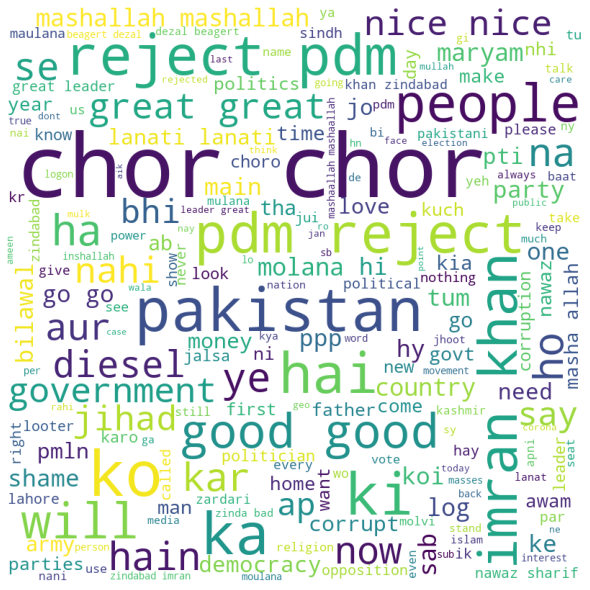

In [ ]:
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in data.comment: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
				stopwords = stopwords, 
				min_font_size = 10).generate(comment_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()



# Facebook Sentiment Words
As we can see the above wordCloud, the most used sentiment Words are
 **Chor** **Dezal** , **reject** , **Corrupt Mola** , **jhoot**, **lootere** **shame** , these words shows the disagreement from the users . Others are **good**, **Masha allah** , **great**, **go imran/niazi** are in the favour of PDM.

# Twitter Dataset Sentiments
The sentiment words from twitter datasets are **protest**, **reject pdm**, **banPti**, **paksitanRejectsPDM**, **corruptImranKhan**, **roadShows**, **chor**, **fantasticTea**, **insane**, **power show**, **good**.

# LABELS
 After having analysis of tweets and comments of datasets, we come up with the following labels:


1.   Neutral : comments that are not related.
2.   Agree : Comments that shows agreement upon pdm
3.   Disagree : commets that shows disagreement upon pdm
4.   Angry   : people having angry opinion for pdm 
5.   sarcastic : people having funny opinion for pdm



# Label Data  #Facebook

In [ ]:

dtlabled = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/fb-labeled.csv",encoding="latin-1")
print("Rows ARE:",len(dtlabled));
list_of_column_names = list(dtlabled.columns) 
  
# displaying the list of column names 
print('List of column names : ',  
      list_of_column_names)

Rows ARE: 1451
List of column names :  ['User', 'Comments', 'Labels']


In [ ]:
dtlabled.head(20)

,User,Comments,Labels
0,Mariyam Irfan,A lot of crowd had gathered to see u but u did...,Agree
1,Ayaz Baig,"A.o.A thats Good leadership dear mam, and bhut...",Agree
2,Tabassum Khan,A1*,Agree
3,Alishba Khan,Absolutely rite imran has demage to this count...,Agree
4,Adnan Khan,Acha thukai lagaya Pak PM Katora khan ka ...ve...,Agree
5,Zain Shamim Jalali,"Against brutal establishment,",Agree
6,M. Fasih Sidd,Agreed,Agree
7,Hassaan Ahmad Alvi,Agreed on every point but why this charter has...,Agree
8,Fiaz Ahmed,Aj lahk raha hai Mariam full fome ma hai,Agree
9,Aftab Ahmed,All are valid and reality based points but the...,Agree


In [ ]:
print("DataSet 1")
label = dtlabled['Labels']

unique_labels = label.value_counts()
# Remove n.a.
labelx = pd.DataFrame({'labels': unique_labels.index,
                                'count': unique_labels.values})
labelx


DataSet 1


,labels,count
0,Angry,580
1,Agree,326
2,DisAgree,311
3,Sarcastic,138
4,Neutral,96


In [ ]:
print("Counting Sentence  #facebook")
commentsx = dtlabled['Comments']

unique_comments = commentsx.value_counts()
# Remove n.a.
unique_commentsFbLabeled = pd.DataFrame({'sentences': unique_comments.index,
                                'count': unique_comments.values})
unique_commentsFbLabeled.drop(0, inplace = True)
# See top few locations
unique_commentsFbLabeled.sort_values(by = 'count', ascending = False).head(20)

Counting Sentence  #facebook


,sentences,count
1,Good,57
2,reject PDM,55
3,Great,38
4,Chor,37
5,Reject PDM,37
6,Great leader,7
7,Chorni,7
8,Lanat,4
9,Mashallah,4
15,Molana zindabad,3


# Sentence Level bar Graph

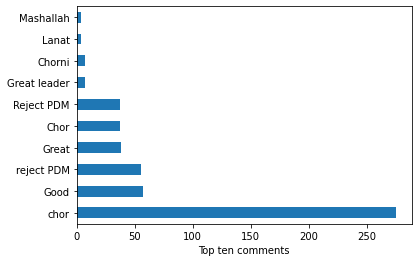

In [ ]:
unique_comments[:10].plot(kind='barh', x="sentences", y="count")
plt.xlabel('Top ten comments');

# Training and Testing Facebook Data

------------TRAINED DATA-------------


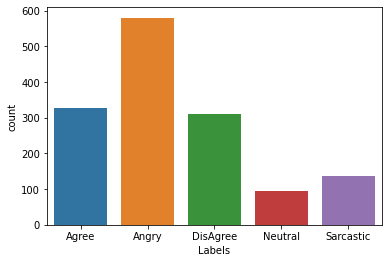

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fbtrainData = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/fb-labeled.csv",encoding="latin-1")
print("------------TRAINED DATA-------------")
sns.countplot(x = 'Labels', data = fbtrainData)


# Pre Processing #Cleaning Data

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

fbtrainData['Comments-punc'] = fbtrainData['Comments'].apply(lambda x: remove_punct(x))
fbtrainData[3:20]

,User,Comments,Labels,Comments-punc
3,Alishba Khan,Absolutely rite imran has demage to this country a lot he is feeling less person,Agree,Absolutely rite imran has demage to this country a lot he is feeling less person
4,Adnan Khan,Acha thukai lagaya Pak PM Katora khan ka ...veey good,Agree,Acha thukai lagaya Pak PM Katora khan ka veey good
5,Zain Shamim Jalali,"Against brutal establishment,",Agree,Against brutal establishment
6,M. Fasih Sidd,Agreed,Agree,Agreed
7,Hassaan Ahmad Alvi,"Agreed on every point but why this charter has nothing to say about corruption, rule of law, ind...",Agree,Agreed on every point but why this charter has nothing to say about corruption rule of law indep...
8,Fiaz Ahmed,Aj lahk raha hai Mariam full fome ma hai,Agree,Aj lahk raha hai Mariam full fome ma hai
9,Aftab Ahmed,All are valid and reality based points but the point that establesment and intelligent agencies ...,Agree,All are valid and reality based points but the point that establesment and intelligent agencies ...
10,Muhammad Sharjeel,All he needs is self-glorification and capturing the multi-media limelight in order to make his ...,Agree,All he needs is selfglorification and capturing the multimedia limelight in order to make his pr...
11,Mohammed Ameen,"also, bring forward the previous video clip of IK made against the army",Agree,also bring forward the previous video clip of IK made against the army
12,Zia Writes,Amazing,Agree,Amazing


# Tokenize

In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

fbtrainData['comments_tokenized'] = fbtrainData['Comments-punc'].apply(lambda x: tokenization(x.lower()))
fbtrainData.head()

,User,Comments,Labels,Comments-punc,comments_tokenized
0,Mariyam Irfan,A lot of crowd had gathered to see u but u didnot come!!,Agree,A lot of crowd had gathered to see u but u didnot come,"[a, lot, of, crowd, had, gathered, to, see, u, but, u, didnot, come]"
1,Ayaz Baig,"A.o.A thats Good leadership dear mam, and bhutto , Tankeed krnay waalay youthiay ap sub ko sharm...",Agree,AoA thats Good leadership dear mam and bhutto Tankeed krnay waalay youthiay ap sub ko sharm ani...,"[aoa, thats, good, leadership, dear, mam, and, bhutto, tankeed, krnay, waalay, youthiay, ap, sub..."
2,Tabassum Khan,A1*,Agree,A,[a]
3,Alishba Khan,Absolutely rite imran has demage to this country a lot he is feeling less person,Agree,Absolutely rite imran has demage to this country a lot he is feeling less person,"[absolutely, rite, imran, has, demage, to, this, country, a, lot, he, is, feeling, less, person]"
4,Adnan Khan,Acha thukai lagaya Pak PM Katora khan ka ...veey good,Agree,Acha thukai lagaya Pak PM Katora khan ka veey good,"[acha, thukai, lagaya, pak, pm, katora, khan, ka, veey, good]"


# Removing StopWords


In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
fbtrainData['comments_nonstop'] = fbtrainData['comments_tokenized'].apply(lambda x: remove_stopwords(x))
fbtrainData.head(10)

,User,Comments,Labels,Comments-punc,comments_tokenized,comments_nonstop
0,Mariyam Irfan,A lot of crowd had gathered to see u but u didnot come!!,Agree,A lot of crowd had gathered to see u but u didnot come,"[a, lot, of, crowd, had, gathered, to, see, u, but, u, didnot, come]","[lot, crowd, gathered, see, u, u, didnot, come]"
1,Ayaz Baig,"A.o.A thats Good leadership dear mam, and bhutto , Tankeed krnay waalay youthiay ap sub ko sharm...",Agree,AoA thats Good leadership dear mam and bhutto Tankeed krnay waalay youthiay ap sub ko sharm ani...,"[aoa, thats, good, leadership, dear, mam, and, bhutto, tankeed, krnay, waalay, youthiay, ap, sub...","[aoa, thats, good, leadership, dear, mam, bhutto, tankeed, krnay, waalay, youthiay, ap, sub, ko,..."
2,Tabassum Khan,A1*,Agree,A,[a],[]
3,Alishba Khan,Absolutely rite imran has demage to this country a lot he is feeling less person,Agree,Absolutely rite imran has demage to this country a lot he is feeling less person,"[absolutely, rite, imran, has, demage, to, this, country, a, lot, he, is, feeling, less, person]","[absolutely, rite, imran, demage, country, lot, feeling, less, person]"
4,Adnan Khan,Acha thukai lagaya Pak PM Katora khan ka ...veey good,Agree,Acha thukai lagaya Pak PM Katora khan ka veey good,"[acha, thukai, lagaya, pak, pm, katora, khan, ka, veey, good]","[acha, thukai, lagaya, pak, pm, katora, khan, ka, veey, good]"
5,Zain Shamim Jalali,"Against brutal establishment,",Agree,Against brutal establishment,"[against, brutal, establishment]","[brutal, establishment]"
6,M. Fasih Sidd,Agreed,Agree,Agreed,[agreed],[agreed]
7,Hassaan Ahmad Alvi,"Agreed on every point but why this charter has nothing to say about corruption, rule of law, ind...",Agree,Agreed on every point but why this charter has nothing to say about corruption rule of law indep...,"[agreed, on, every, point, but, why, this, charter, has, nothing, to, say, about, corruption, ru...","[agreed, every, point, charter, nothing, say, corruption, rule, law, independence, police, limit..."
8,Fiaz Ahmed,Aj lahk raha hai Mariam full fome ma hai,Agree,Aj lahk raha hai Mariam full fome ma hai,"[aj, lahk, raha, hai, mariam, full, fome, ma, hai]","[aj, lahk, raha, hai, mariam, full, fome, hai]"
9,Aftab Ahmed,All are valid and reality based points but the point that establesment and intelligent agencies ...,Agree,All are valid and reality based points but the point that establesment and intelligent agencies ...,"[all, are, valid, and, reality, based, points, but, the, point, that, establesment, and, intelli...","[valid, reality, based, points, point, establesment, intelligent, agencies, keep, always, away, ..."


# Urdu Stopwords Removing

In [ ]:
corpus=[]
stopwords=['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh', 'bhi', 'aur', 'wo', 'yeh', 'raha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']
def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text
    
fbtrainData['comments_Urdunonstop'] = fbtrainData['comments_tokenized'].apply(lambda x: remove_stopwords(x))
fbtrainData.head(10)


,User,Comments,Labels,Comments-punc,comments_tokenized,comments_nonstop,comments_Urdunonstop
0,Mariyam Irfan,A lot of crowd had gathered to see u but u didnot come!!,Agree,A lot of crowd had gathered to see u but u didnot come,"[a, lot, of, crowd, had, gathered, to, see, u, but, u, didnot, come]","[lot, crowd, gathered, see, u, u, didnot, come]","[a, lot, of, crowd, had, gathered, see, u, but, u, didnot, come]"
1,Ayaz Baig,"A.o.A thats Good leadership dear mam, and bhutto , Tankeed krnay waalay youthiay ap sub ko sharm...",Agree,AoA thats Good leadership dear mam and bhutto Tankeed krnay waalay youthiay ap sub ko sharm ani...,"[aoa, thats, good, leadership, dear, mam, and, bhutto, tankeed, krnay, waalay, youthiay, ap, sub...","[aoa, thats, good, leadership, dear, mam, bhutto, tankeed, krnay, waalay, youthiay, ap, sub, ko,...","[aoa, thats, good, leadership, dear, mam, and, bhutto, tankeed, krnay, waalay, youthiay, ap, sub..."
2,Tabassum Khan,A1*,Agree,A,[a],[],[a]
3,Alishba Khan,Absolutely rite imran has demage to this country a lot he is feeling less person,Agree,Absolutely rite imran has demage to this country a lot he is feeling less person,"[absolutely, rite, imran, has, demage, to, this, country, a, lot, he, is, feeling, less, person]","[absolutely, rite, imran, demage, country, lot, feeling, less, person]","[absolutely, rite, imran, has, demage, this, country, a, lot, he, feeling, less, person]"
4,Adnan Khan,Acha thukai lagaya Pak PM Katora khan ka ...veey good,Agree,Acha thukai lagaya Pak PM Katora khan ka veey good,"[acha, thukai, lagaya, pak, pm, katora, khan, ka, veey, good]","[acha, thukai, lagaya, pak, pm, katora, khan, ka, veey, good]","[thukai, lagaya, pak, pm, katora, khan, veey, good]"
5,Zain Shamim Jalali,"Against brutal establishment,",Agree,Against brutal establishment,"[against, brutal, establishment]","[brutal, establishment]","[against, brutal, establishment]"
6,M. Fasih Sidd,Agreed,Agree,Agreed,[agreed],[agreed],[agreed]
7,Hassaan Ahmad Alvi,"Agreed on every point but why this charter has nothing to say about corruption, rule of law, ind...",Agree,Agreed on every point but why this charter has nothing to say about corruption rule of law indep...,"[agreed, on, every, point, but, why, this, charter, has, nothing, to, say, about, corruption, ru...","[agreed, every, point, charter, nothing, say, corruption, rule, law, independence, police, limit...","[agreed, on, every, point, but, why, this, charter, has, nothing, say, about, corruption, rule, ..."
8,Fiaz Ahmed,Aj lahk raha hai Mariam full fome ma hai,Agree,Aj lahk raha hai Mariam full fome ma hai,"[aj, lahk, raha, hai, mariam, full, fome, ma, hai]","[aj, lahk, raha, hai, mariam, full, fome, hai]","[aj, lahk, mariam, full, fome, ma]"
9,Aftab Ahmed,All are valid and reality based points but the point that establesment and intelligent agencies ...,Agree,All are valid and reality based points but the point that establesment and intelligent agencies ...,"[all, are, valid, and, reality, based, points, but, the, point, that, establesment, and, intelli...","[valid, reality, based, points, point, establesment, intelligent, agencies, keep, always, away, ...","[all, are, valid, and, reality, based, points, but, the, point, that, establesment, and, intelli..."


# Vectorization -Converting text words into number value

In [ ]:
ps = nltk.PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
countVectorizer = CountVectorizer(analyzer=clean_text) 
train_vectors = countVectorizer.fit_transform(fbtrainData['Comments'])

fbtestData = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/fb-testData.csv",encoding="latin-1")
test_vectors = countVectorizer.transform(fbtrainData['Comments'])


# Creating a Linear SVM Model

In [ ]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, fbtrainData['Labels'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(fbtrainData['Labels'], prediction_linear, output_dict=True)
print('Agree: ', report['Agree'])
print('DisAgree: ', report['DisAgree'])
print('Angry: ', report['Angry'])
print('Sarcastic: ', report['Sarcastic'])
print('Neutral: ', report['Neutral'])
from sklearn.metrics import accuracy_score
acc =accuracy_score(fbtrainData['Labels'],prediction_linear)*100



Training time: 0.146357s; Prediction time: 0.066615s
Agree:  {'precision': 0.9787878787878788, 'recall': 0.99079754601227, 'f1-score': 0.9847560975609756, 'support': 326}
DisAgree:  {'precision': 0.9933774834437086, 'recall': 0.9646302250803859, 'f1-score': 0.9787928221859707, 'support': 311}
Angry:  {'precision': 0.9863713798977853, 'recall': 0.9982758620689656, 'f1-score': 0.9922879177377891, 'support': 580}
Sarcastic:  {'precision': 0.9857142857142858, 'recall': 1.0, 'f1-score': 0.9928057553956835, 'support': 138}
Neutral:  {'precision': 1.0, 'recall': 0.9583333333333334, 'f1-score': 0.9787234042553191, 'support': 96}


In [ ]:

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score


import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
train, test = train_test_split(fbtrainData, test_size=0.2, random_state=1)
X_train = train['Comments'].values
X_test = test['Comments'].values
y_train = train['Labels']
y_test = test['Labels']

my_tags = ['Angry','Agree','DisAgree','Sarcastic','Neutral']
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)



y_pred = sgd.predict(X_test)
acc=accuracy_score(y_pred, y_test)*100
print('accuracy',acc )
print(classification_report(y_test, y_pred,target_names=my_tags))


accuracy 71.1340206185567
              precision    recall  f1-score   support

       Angry       0.80      0.90      0.85        70
       Agree       0.74      0.84      0.79       102
    DisAgree       0.62      0.69      0.65        67
   Sarcastic       0.75      0.14      0.23        22
     Neutral       0.50      0.30      0.37        30

    accuracy                           0.71       291
   macro avg       0.68      0.57      0.58       291
weighted avg       0.70      0.71      0.69       291



# Confusion Matrix Using Heat Map

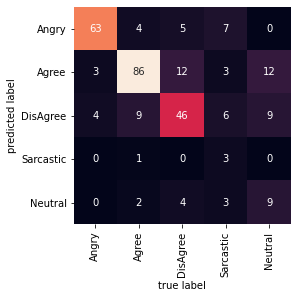

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=my_tags,
            yticklabels=my_tags)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Testing Trained Model

In [ ]:
test_vectors2 = countVectorizer.transform(fbtestData['comments'])
prediction_linear = classifier_linear.predict(test_vectors2)
print(prediction_linear)
data = {'Comments':fbtestData['comments'], 
        'Labels':prediction_linear} 
df = pd.DataFrame(data)
df.head(10)

['DisAgree' 'Angry' 'Angry' ... 'Agree' 'Agree' 'Agree']


,Comments,Labels
0,I dont think so that the narrative of Qaid e Azam was to rob national treasure and stash money a...,DisAgree
1,I FAIL TO UNDERSTAND THE JUDICIARY SYSTEM AND LAWS OF ISLAMIC REPUBLIC OF PAKISTAN. A CONVICTED ...,Angry
2,I FAIL TO UNDERSTAND THE JUDICIARY SYSTEM AND LAWS OF ISLAMIC REPUBLIC OF PAKISTAN. A CONVICTED ...,Angry
3,I FAIL TO UNDERSTAND THE JUDICIARY SYSTEM AND LAWS OF ISLAMIC REPUBLIC OF PAKISTAN. A CONVICTED ...,Angry
4,I feel pity for those who still follow such narratives. These type of hybrid moulana can say any...,DisAgree
5,I hate politics Its full of lie to people . Its time waste,Sarcastic
6,I hate this orat,Angry
7,"I have no relation or any obligation with any political party including PTI and the opposition, ...",DisAgree
8,"I hope, trust & pray that saber elements will prevail and avoid confrontational politics which i...",Neutral
9,I like maryam nwaz wahh maryam nwaz,DisAgree


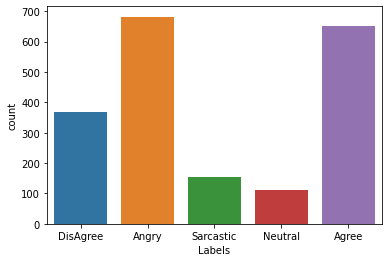

In [ ]:
sns.countplot(x = 'Labels', data = df)

# LSTM

In [ ]:
# Filter the text -not included Neutral
import pandas as pd

fbtrainData = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/Combine-fb-twitter-train-data.csv",encoding="latin-1")
fbtrainData = fbtrainData[fbtrainData['Labels'] != 'Neutral']
fbtrainData

,Users,Comments,Labels
0,?? ?? ?? ????? ??? ??? ???? ??? ??? ????,RT @AseefaBZ: Thank you to the workers and lea...,Agree
1,?? ?????,RT @IhsanMarwat_786: #PDM Loralai power shows ...,Agree
2,??? ???,@Hussain_NSharif give me a follow back Respect...,Agree
3,??? ???? ????,RT @IhsanMarwat_786: #PDM Loralai power shows ...,Agree
4,???? ????,Great,Agree
...,...,...,...
2576,BTV,#Headlines 1800 PST - 15th January 2021 - #BTV...,NaN
2577,BTV,#Headlines 1500 PST - 15th January 2021 - #BTV...,NaN
2578,BTV,#Headlines 1200 PST - 15th January 2021 - #BTV...,NaN
2579,Marium,RT @zaaraZAK: To whom it may concern! ! #PDM #...,NaN


# Build Model -LSTM

The model consists of an embedding layer, LSTM layer and a Dense layer which is a fully connected neural network with sigmoid as the activation function.
Dropouts are added in-between layers and also on the LSTM layer to avoid overfitting.

In [ ]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation
from tensorflow.keras.layers import LSTM,Dense, Dropout
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)
X = []
sentences = list(fbtrainData['Comments'])
for sen in sentences:
    X.append(preprocess_text(sen))
X[3]

'RT IhsanMarwat PDM Loralai power shows Beautiful sceens MaulanaLeadsPDM Loralai https co FUvOPVp Et'

In [ ]:
y = fbtrainData['Labels']
y = np.array(list(map(lambda x: 1 if ( x=="DisAgree" or x == "Angry" or x =="Sarcastic") else  0, y)))


In [ ]:
Xl_train, Xl_test, yl_train, yl_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(Xl_test[7])
print(yl_test[7])


RT PTIOfficialRWP These Said faces are indicating that PakistanRejectsPDM https co kYPfIn YTg
1


# Preparing the Embedding Layer

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Xl_train)

words_to_index = tokenizer.word_index


In [ ]:

Xl_train = tokenizer.texts_to_sequences(Xl_train)
Xl_test = tokenizer.texts_to_sequences(Xl_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(Xl_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(Xl_test, padding='post', maxlen=maxlen)


In [ ]:
epochs = 10
emb_dim = 128
batch_size = 256

In [ ]:
print((X_train.shape, yl_train.shape, X_test.shape, yl_test.shape))

((1869, 100), (1869,), (468, 100), (468,))


In [ ]:
fbtrainData.shape[1]

3

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[maxlen])
    layer = Embedding(vocab_size,50,input_length=maxlen)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 100)]             0         
_________________________________________________________________
embedding_17 (Embedding)     (None, 100, 50)           191700    
_________________________________________________________________
lstm_17 (LSTM)               (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_34 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257

In [ ]:
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
history = model.fit(X_train,yl_train,epochs=20)

Epoch 1/20
59/59 [==============================] - 6s 59ms/step - loss: 0.5793 - accuracy: 0.7695
Epoch 2/20
59/59 [==============================] - 4s 61ms/step - loss: 0.5565 - accuracy: 0.7583
Epoch 3/20
59/59 [==============================] - 4s 63ms/step - loss: 0.5699 - accuracy: 0.7508
Epoch 4/20
59/59 [==============================] - 4s 62ms/step - loss: 0.5396 - accuracy: 0.7778
Epoch 5/20
59/59 [==============================] - 4s 64ms/step - loss: 0.5813 - accuracy: 0.7338
Epoch 6/20
59/59 [==============================] - 4s 66ms/step - loss: 0.5464 - accuracy: 0.7693
Epoch 7/20
59/59 [==============================] - 4s 65ms/step - loss: 0.5493 - accuracy: 0.7653
Epoch 8/20
59/59 [==============================] - 4s 65ms/step - loss: 0.5325 - accuracy: 0.7771
Epoch 9/20
59/59 [==============================] - 4s 67ms/step - loss: 0.5564 - accuracy: 0.7594
Epoch 10/20
59/59 [==============================] - 4s 69ms/step - loss: 0.5245 - accuracy: 0.7839
Epoch 11/

In [ ]:
accr = model.evaluate(X_test,yl_test)

15/15 [==============================] - 1s 14ms/step - loss: 0.5951 - accuracy: 0.7350


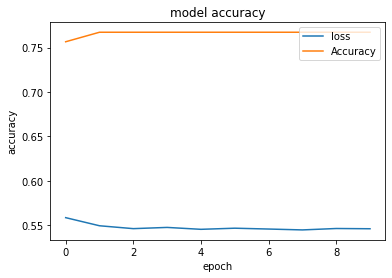

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss','Accuracy'], loc='upper right')
plt.show()




In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
datalstm = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/Combine-fb-twitter-train-data.csv",usecols=['Comments', 'Labels'],encoding="latin-1")
datalstm.Labels.value_counts()

DisAgree     885
Angry        670
Agree        553
Neutral      244
Sarcastic    223
Name: Labels, dtype: int64

In [ ]:
num_of_categories = 2500
shuffled = datalstm.reindex(np.random.permutation(datalstm.index))
an = shuffled[shuffled['Labels'] == 'Angry'][:num_of_categories]
d = shuffled[shuffled['Labels'] == 'DisAgree'][:num_of_categories]
s = shuffled[shuffled['Labels'] == 'Sarcastic'][:num_of_categories]
a = shuffled[shuffled['Labels'] == 'Agree'][:num_of_categories]
n = shuffled[shuffled['Labels'] == 'Neutral'][:num_of_categories]
concated = pd.concat([an,d,s,a,n], ignore_index=True)
#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
print(concated)
concated['LABEL'] = 0

                                                                                                 Comments     Labels
499   RT @mawish_m: 'The state needs to act regarding PDM hate speech before violence erupts in the st...      Angry
669                                                                 Choooro ka sardar fazal Rehman ghadar      Angry
871                                                    I Rejects PDM from Karachi \n\n#PakistanRejectsPDM   DisAgree
1412                                                                                           reject PDM   DisAgree
624                                                                                                  chor      Angry
...                                                                                                   ...        ...
714     #PakistanMovingForward #PakistanRejectsPDM #Pakistan this is the reality. https://t.co/ZkUBU7U8w4   DisAgree
268                                                             

In [ ]:
#One-hot encode the lab
concated.loc[concated['Labels'] == 'Neutral', 'LABEL'] = 0
concated.loc[concated['Labels'] == 'Agree', 'LABEL'] = 1
concated.loc[concated['Labels'] == 'Angry', 'LABEL'] = 2
concated.loc[concated['Labels'] == 'DisAgree', 'LABEL'] = 3
concated.loc[concated['Labels'] == 'Sarcastic', 'LABEL'] = 4

print(concated['LABEL'][:100])
labels = to_categorical(concated['LABEL'], num_classes=5)
print(labels[:10])
if 'Labels' in concated.keys():
    concated.drop(['Labels'], axis=1)

499     2
669     2
871     3
1412    3
624     2
       ..
365     2
2488    0
2324    1
111     2
270     2
Name: LABEL, Length: 100, dtype: int64
[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [ ]:
n_most_common_words = 5000
max_len = 130
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(concated['Comments'].values)
sequences = tokenizer.texts_to_sequences(concated['Comments'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 5145 unique tokens.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.25, random_state=42)

epochs = 5
emb_dim = 128
batch_size = 8
labels[:2]

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:

print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.5))
model.add(LSTM(64, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

((1931, 130), (1931, 5), (644, 130), (644, 5))
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_21 (Embedding)     (None, 130, 128)          640000    
_________________________________________________________________
spatial_dropout1d_12 (Spatia (None, 130, 128)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_28 (Dense)             (None, 5)                 325       
Total params: 689,733
Trainable params: 689,733
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
193/193 [==============================] - 28s 135ms/step - loss: 1.4574 - acc: 0.3905 - val_loss: 1.0452 - val_acc: 0.5840
Epoch 2/5
193/193 [==============================] - 25s 12

In [ ]:
accr = model.evaluate(X_test,y_test)

21/21 [==============================] - 0s 23ms/step - loss: 0.7972 - acc: 0.7267


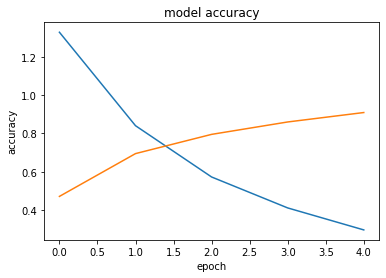

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

# T W I T T E R - WORDCLOUD _ DEMOGRAPHIC 

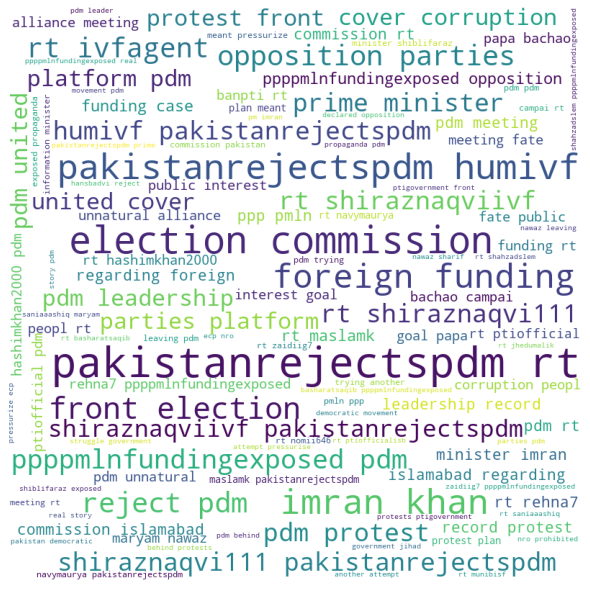

In [ ]:
c_words = ''
dataset = pd.read_csv(r"/content/drive/MyDrive/DataVisualization/Twitter-TestData.csv",encoding="latin-1")

import re


def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)


def remove_html(text):
    html = re.compile(r"<.*?>")
    return html.sub(r"", text)
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)
import string


def remove_punct(text):
    table = str.maketrans("", "", string.punctuation)
    return text.translate(table)
dataset["comments"] = dataset.comments.map(lambda x: remove_URL(x))
dataset["comments"] = dataset.comments.map(lambda x: remove_html(x))
dataset["comments"] = dataset.comments.map(lambda x: remove_emoji(x))
dataset["comments"] = dataset.comments.map(lambda x: remove_punct(x))

from nltk.corpus import stopwords

stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)
dataset["comments"] = dataset.comments.map(remove_stopwords)

for val in dataset.comments: 
	
	# typecaste each val to string 
	val = str(val) 

	# split the value 
	tokens = val.split() 
	
	# Converts each token into lowercase 
	for i in range(len(tokens)): 
		tokens[i] = tokens[i].lower() 
	
	c_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, 
				background_color ='white', 
	
				min_font_size = 10).generate(c_words) 

# plot the WordCloud image					 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [ ]:
print("Unique Location")
location = dataset['location']
print('No. of distinct locations listed by twitter users is:', len(location.value_counts()))
unique_locations = location.value_counts()


# Remove n.a.
unique_locations2 = pd.DataFrame({'locations': unique_locations.index,
                                'count': unique_locations.values})
unique_locations2.drop(0, inplace = True)
# See top few locations
unique_locations2.sort_values(by = 'count', ascending = False).head(10)


Unique Location
No. of distinct locations listed by twitter users is: 941


,locations,count
1,"Lahore, Pakistan",462
2,"Islamabad, Pakistan",324
3,"Bahawalnagar, Pakistan",286
4,"Peshawar, Pakistan",260
5,"Punjab, Pakistan",209
6,Rahim Yar Khan punjab Pakistan,187
7,"Riyadh, Kingdom of Saudi Arabi",169
8,"?????, ???????",153
9,"Karachi, Pakistan",136
10,"Dubai, United Arab Emirates",102


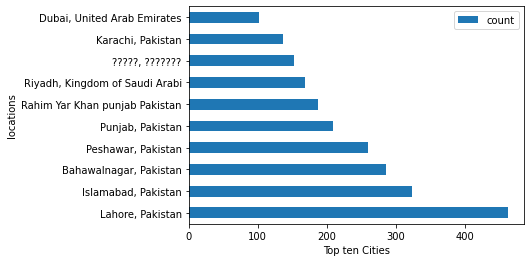

In [ ]:
unique_locations2[:10].plot(kind='barh', x="locations", y="count")
plt.xlabel('Top ten Cities');

# **CNN**

In [ ]:

import random
import numpy as np
import math
import re
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pickle
from sklearn.model_selection import train_test_split
from google.colab import drive
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [ ]:
#Setting up a seed for reproducibility
seed = random.seed(42)

In [ ]:

datasetC = pd.read_csv("/content/drive/MyDrive/DataVisualization/Combine-fb-twitter-train-data.csv",encoding="latin1")

datasetC.head()


,Users,Comments,Labels
0,?? ?? ?? ????? ??? ??? ???? ??? ??? ????,RT @AseefaBZ: Thank you to the workers and lea...,Agree
1,?? ?????,RT @IhsanMarwat_786: #PDM Loralai power shows ...,Agree
2,??? ???,@Hussain_NSharif give me a follow back Respect...,Agree
3,??? ???? ????,RT @IhsanMarwat_786: #PDM Loralai power shows ...,Agree
4,???? ????,Great,Agree


In [ ]:
datasetC.drop(['Users'], axis=1, inplace=True)

In [ ]:

datasetC.columns = ["Comments", "Labels"]

In [ ]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, "lxml").get_text()
    # Removing the @
    tweet = re.sub(r"@[A-Za-z0-9]+", ' ', tweet)
    # Removing the URL links
    tweet = re.sub(r"https?://[A-Za-z0-9./]+", ' ', tweet)
    # Keeping only letters
    tweet = re.sub(r"[^a-zA-Z.!?']", ' ', tweet)
    # Removing additional whitespaces
    tweet = re.sub(r" +", ' ', tweet)
    return tweet

In [ ]:

datasetClean = datasetC.Comments.map(lambda x: clean_tweet(x))
datasetClean

0       RT Thank you to the workers and leadership of ...
1       RT PDM Loralai power shows Beautiful sceens Ma...
2        NSharif give me a follow back Respective sir ...
3       RT PDM Loralai power shows Beautiful sceens Ma...
4                                                   Great
                              ...                        
2576     Headlines PST th January BTV Badar Television...
2577     Headlines PST th January BTV Badar Television...
2578     Headlines PST th January BTV Badar Television...
2579    RT To whom it may concern! ! PDM PDMJalsa ??? ...
2580    RT N pdm rally towards RWP and there will be ?...
Name: Comments, Length: 2581, dtype: object

In [ ]:
set(datasetC.Labels)

{'Agree', 'Angry', 'DisAgree', 'Neutral', 'Sarcastic', nan}

In [ ]:
y = datasetC['Labels']
y = np.array(list(map(lambda x: 0 if x=="DisAgree" else (2 if x=="Angry" else  3 if x=="Sarcastic"  else 4 if x=="Neutral" else 1), y)))
set(y)

{0, 1, 2, 3, 4}

In [ ]:
import tensorflow_datasets as tfds
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    datasetClean, target_vocab_size=2**16)

In [ ]:
train_inputs = [tokenizer.encode(sentence) for sentence in datasetClean]
train_inputs

[[1,
  2089,
  54,
  6,
  2,
  635,
  7,
  349,
  5,
  59,
  3,
  51,
  98,
  2016,
  127,
  1572,
  7,
  1826,
  22,
  190],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [5464,
  4714,
  383,
  83,
  12,
  3755,
  316,
  4606,
  941,
  1417,
  2815,
  2209,
  220,
  152,
  130,
  219,
  4784],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [89],
 [3668],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [61],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [5464, 3, 16, 28, 42, 45, 43, 44, 16],
 [1,
  469,
  549,
  690,
  8,
  2,
  1057,
  1594,
  4,
  9,
  1057,
  59,
  165,
  848,
  29,
  6,
  1625,
  488,
  115,
  50,
  1898,
  666,
  9,
  1643],
 [1,
  469,
  549,
  690,
  8,
  2,
  1057,
  1594,
  4,
  9,
  1057,
  59,
  165,
  848,
  29,
  6,
  1625,
  488,
  115,
  50,
  1898,
  666,
  9,
  1643],
 [1, 3, 16, 28, 42, 45, 43, 44, 16],
 [576],
 [1,
  616,
  12,
  164,
  5,
  3,
  2405,
  115,
  1275,
  5471,
  14,
  674,
  1676,
  2996,
  107,
  3150,
  451,
  9,
  19,
  436,
  5,

In [ ]:

MAX_LEN = max([len(sentence) for sentence in train_inputs])
train_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    train_inputs, value=0, padding="post", maxlen=MAX_LEN)


In [ ]:
i_train, i_test, o_train, o_test = train_test_split(train_inputs, y, test_size=0.2, random_state=seed)

i_train, i_val, o_train, o_val = train_test_split(i_train, o_train, test_size=0.1, random_state=seed)
print(i_train)
print(o_train)

[[ 218 1358    0 ...    0    0    0]
 [4499  157 1076 ...    0    0    0]
 [ 724  566    0 ...    0    0    0]
 ...
 [   1    3   30 ...    0    0    0]
 [ 475 1011 2787 ...    0    0    0]
 [2246   53  728 ...    0    0    0]]
[2 2 1 ... 0 4 3]


In [ ]:

class DCNN(tf.keras.Model):
    
    def __init__(self,
                 vocab_size,  #Size of the vocabulary used. Will be given by the tokenizer
                 emb_dim=64,  #128 is just an intuitive default value, it's used so ofter for embedding 
                 nb_filters=100,  #100Number of times we want to apply each filter
                 FFN_units=32,  #512Number of units of the feedforward neural network at the end
                 nb_classes=5,  #Binary classification as default ????????????????????????????????????????
                 dropout_rate=0.1,  #To turn off certain units/parameters to avoid overfitting
                 training=False,  #True if the network is in evaluation phase. Drop out will be applied only in training
                 name="dcnn"):  #A name for the network
        super(DCNN, self).__init__(name=name)

        self.embedding = layers.Embedding(vocab_size,
                                          emb_dim)
        self.bigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=2,
                                    padding="valid",  #To add the zeros we need to performe the last convolutions
                                    activation="relu")
        self.trigram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=3,
                                    padding="valid",  #To add the zeros we need to performe the last convolutions
                                    activation="relu")
        self.fourgram = layers.Conv1D(filters=nb_filters,
                                    kernel_size=4,
                                    padding="valid",  #To add the zeros we need to performe the last convolutions
                                    activation="relu")
        self.pool = layers.GlobalMaxPool1D()  #We'll be using this layer for all pooling steps
        self.dense_1 = layers.Dense(units=FFN_units, activation="softmax")
        self.dropout = layers.Dropout(rate=dropout_rate)  #This is a good place to define dropout since dense_1 with create a lot of params
        if nb_classes == 2:  #Easy way to handle multiclasses
            self.last_dense = layers.Dense(units=1,
                                           activation="sigmoid")
        else:
            self.last_dense = layers.Dense(units=nb_classes,
                                           activation="softmax")
    
    def call(self, inputs, training):
        x = self.embedding(inputs)
        x_1 = self.bigram(x)
        x_1 = self.pool(x_1)
        x_2 = self.trigram(x)
        x_2 = self.pool(x_2)
        x_3 = self.fourgram(x)
        x_3 = self.pool(x_3)

        merged = tf.concat([x_1, x_2, x_3], axis=-1)  #(batch_size, 3 * nb_filters) 3 because we have 3 types of filters
        merged = self.dense_1(merged)  #Staring the feedforward process
        merged = self.dropout(merged, training)  #Applying dropout if training=True
        output = self.last_dense(merged)  
        
        return output

In [ ]:
VOCAB_SIZE = tokenizer.vocab_size

#These are basicaly hyperparameters
EMB_DIM = 128
NB_FILTERS = 20
FFN_UNITS = 32
NB_CLASSES = len(set(y))

DROPOUT_RATE = 0.2

BATCH_SIZE = 2
NB_EPOCHS = 10

In [ ]:

dcnn = DCNN(vocab_size=VOCAB_SIZE,
            emb_dim=EMB_DIM,
            nb_filters=NB_FILTERS,
            FFN_units=FFN_UNITS,
            nb_classes=NB_CLASSES,
            dropout_rate=DROPOUT_RATE)

In [ ]:
#dcnn.compile(loss="sparse_categorical_crossentropy",  #Standard loss when doing a multiclass classification
 #                optimizer="adam",
 #                metrics=["sparse_categorical_accuracy"]) #adam

In [ ]:
dcnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = dcnn.fit(i_train, o_train, epochs=NB_EPOCHS, batch_size=BATCH_SIZE, validation_data=(i_val,o_val) )


Epoch 1/20
929/929 [==============================] - 10s 10ms/step - loss: 1.4747 - accuracy: 0.4105 - val_loss: 1.2096 - val_accuracy: 0.6087
Epoch 2/20
929/929 [==============================] - 9s 10ms/step - loss: 1.1047 - accuracy: 0.6603 - val_loss: 1.0545 - val_accuracy: 0.6618
Epoch 3/20
929/929 [==============================] - 9s 10ms/step - loss: 0.9382 - accuracy: 0.6925 - val_loss: 0.9649 - val_accuracy: 0.6908
Epoch 4/20
929/929 [==============================] - 10s 10ms/step - loss: 0.7553 - accuracy: 0.7497 - val_loss: 0.9057 - val_accuracy: 0.6715
Epoch 5/20
929/929 [==============================] - 10s 10ms/step - loss: 0.6208 - accuracy: 0.7962 - val_loss: 0.8800 - val_accuracy: 0.6812
Epoch 6/20
929/929 [==============================] - 10s 10ms/step - loss: 0.5035 - accuracy: 0.8439 - val_loss: 0.8780 - val_accuracy: 0.6957
Epoch 7/20
929/929 [==============================] - 10s 11ms/step - loss: 0.4959 - accuracy: 0.8213 - val_loss: 0.8990 - val_accuracy: 0

In [ ]:
#history = dcnn.fit(i_train, 
 #         o_train,
  #       batch_size=BATCH_SIZE,
 #        epochs=NB_EPOCHS)#

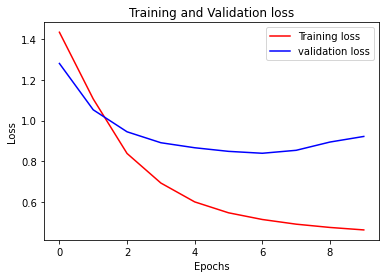

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(0,NB_EPOCHS)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

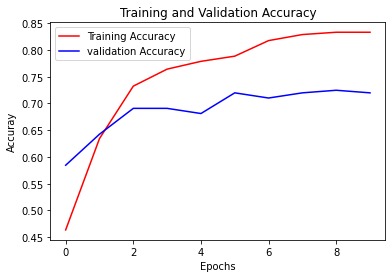

In [ ]:
train_accuracy = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(0,NB_EPOCHS)
plt.plot(epochs, train_accuracy, 'r', label='Training Accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuray')
plt.legend()
plt.show()

In [ ]:
results = dcnn.evaluate(i_test, o_test, batch_size=BATCH_SIZE)
print(results)

259/259 [==============================] - 0s 2ms/step - loss: 0.8788 - accuracy: 0.7234
[0.8787510395050049, 0.7234042286872864]


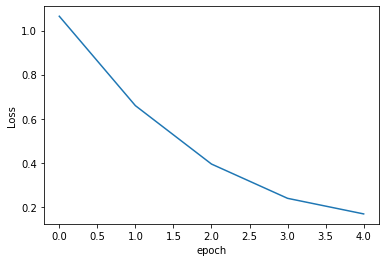

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])

plt.ylabel('Loss')
plt.xlabel('epoch')

plt.show()

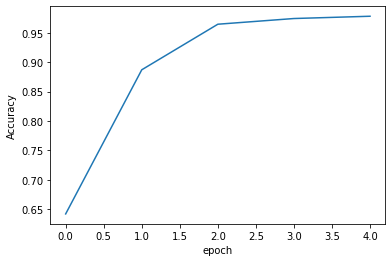

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('epoch')

plt.show()

# PIE CHART - YOUTUBE VIEWS FOR PDM JALSA COVERAGE - DATA GATHERED BEFORE 2021

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
df =  pd.read_csv('/content/drive/MyDrive/DataVisualization/newsChannelsdata.csv')
news_channel = df['Channel'];
news_channel

0         ARY NEWS LIVE
1    Al Jazeera English
2            AP Archive
3    Study IQ education
4              HUM News
5              ARY News
6              Geo News
7              BOL News
8            24 News HD
9          Express News
Name: Channel, dtype: object

In [ ]:
views = df['Number of views']
views

0     32586
1     44927
2      1462
3     81064
4     95365
5     32586
6     20148
7    536537
8     25583
9    896523
Name: Number of views, dtype: int64

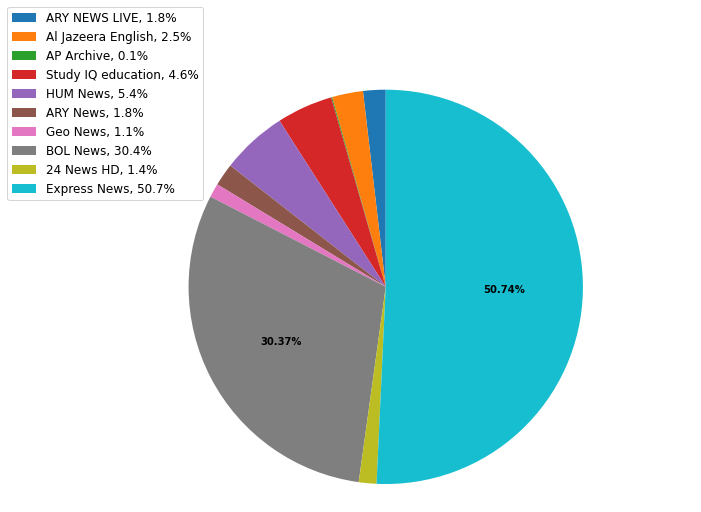

In [ ]:
import matplotlib.pyplot as plt


def autopct_generator(limit):
    """Remove percent on small slices."""
    def inner_autopct(pct):
        return ('%.2f%%' % pct) if pct > limit else ''
    return inner_autopct

labels = df['Channel']
sizes =  df['Number of views']
fig1, ax1 = plt.subplots(figsize=(6, 5))

# set color theme

theme = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b", "#00ffff","#FF69B4","#FF00FF","#FFFF00","#800080"]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 1.3, box.height])

_, _, autotexts = ax1.pie(sizes, autopct=autopct_generator(7), startangle=90, radius=1.8 * 1000)
for autotext in autotexts:
    autotext.set_weight('bold')
ax1.axis('equal')
total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 12},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
fig1.set_size_inches(8.5, 8)
fig1.savefig('chart.png')

# LIKE / DISLIKE FOR PDM COVERAGE ON YOUTUBE

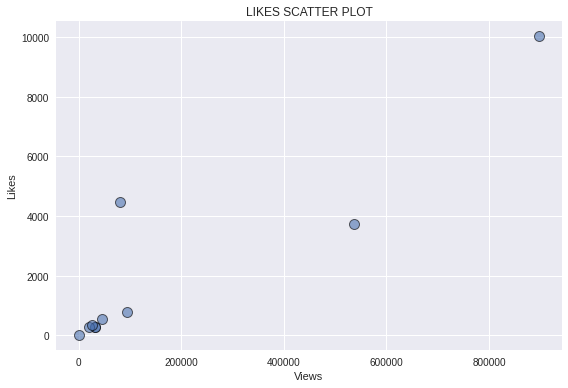

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')  # to get seaborn scatter plot

view_count = df['Number of views']
likes = df['Number of likes']
dislike = df['    Number of dislikes']

plt.scatter(view_count, likes, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('LIKES SCATTER PLOT')
plt.xlabel('Views')
plt.ylabel('Likes')

plt.tight_layout()
plt.show()


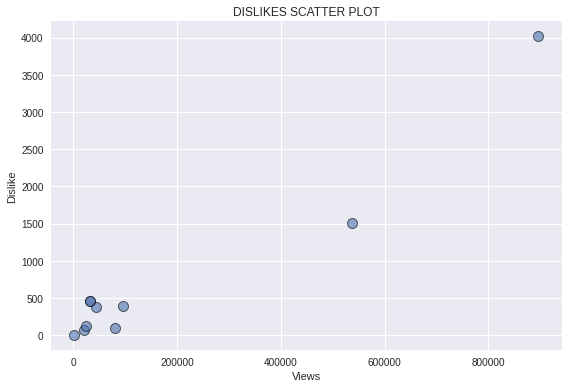

In [ ]:
plt.scatter(view_count, dislike, s=100, alpha=0.6, edgecolor='black', linewidth=1)

plt.title('DISLIKES SCATTER PLOT')
plt.xlabel('Views')
plt.ylabel('Dislike')

plt.tight_layout()
plt.show()